<a href="https://colab.research.google.com/github/WilliamYkZhang/COMP551_A2/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
stemmed_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_SnowballStemmer.csv?token=AKKZG4FIMNL4RZOBOMSF2V25WNYXW")
# lemmatized_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_WordNetLemmatizer.csv?token=AKKZG4HQMPHQZO4UAY6WHHK5WNY6E")

In [0]:
def word_count(sentence):
  return len(word_tokenize(sentence))

def comment_length(sentence):
  return len(sentence)

In [0]:
# Number of word
stemmed_df["Word Count"] = stemmed_df["cleaned"].apply(word_count)

# Length of comments
stemmed_df["comment_length"] = stemmed_df["cleaned"].apply(comment_length)

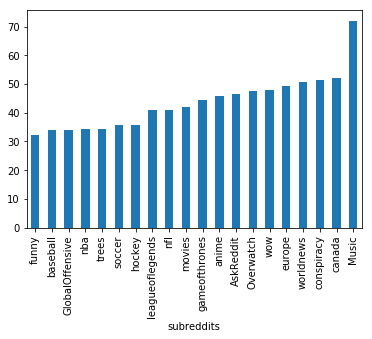

In [6]:
# Using plots to inspect correlation of the comment length and the subreddit category
# average_comment_length = pd.DataFrame(stemmed_df.groupby("subreddits").comment_length.mean())
average_word_count = stemmed_df.groupby("subreddits")["Word Count"].mean().sort_values(ascending=True)

# print(average_comment_length)
# print(average_word_count)
# print(average_comment_length.plot.bar())
average_word_count.plot.bar()

# plt.bar(average_word_count, average_word_count.index)
plt.savefig('Average word count per subreddit.png')
files.download("Average word count per subreddit.png") 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer(max_features=30000, lowercase=True, encoding="utf-8", decode_error="ignore", strip_accents='unicode',stop_words=stopwords.words('english'), analyzer = "word")

# Storing vocabulary for each subreddit into a list
vocabulary = []

# Find most frequent words for each subreddits 
for group in stemmed_df.groupby("label"):
    count_list = c_vect.fit_transform(group[1].cleaned).toarray().sum(axis=0) # sum along the rows
    word_list = c_vect.get_feature_names()
    vocabulary.append(dict(zip(word_list,count_list)))
   
 

In [8]:
# Make a list of subreddits
subreddits = []

for group in stemmed_df.groupby("label"):
  subreddits.append(group[1].subreddits.values[0])
  
print(subreddits)
  

['AskReddit', 'GlobalOffensive', 'Music', 'Overwatch', 'anime', 'baseball', 'canada', 'conspiracy', 'europe', 'funny', 'gameofthrones', 'hockey', 'leagueoflegends', 'movies', 'nba', 'nfl', 'soccer', 'trees', 'worldnews', 'wow']


In [0]:
import operator 

word_dict = dict()

vocabulary[1]

# Sort each dictionary by value
for subreddit, voc in zip(subreddits, vocabulary):
# Convert each vocabulary into a list of tuples 
    voc = list(voc.items())
    sorted_dict = sorted(voc,key=operator.itemgetter(1), reverse=True)
    words, counts = zip(*sorted_dict)    
    word_dict[subreddit] = {"words":words, "counts":counts}

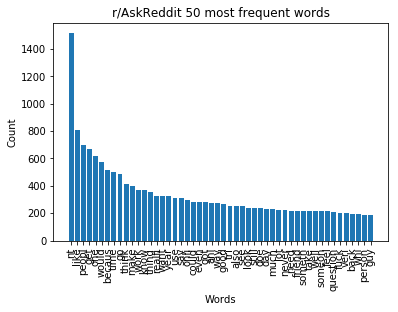

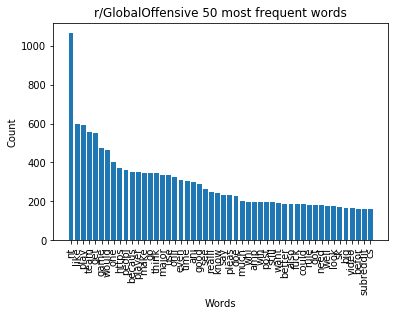

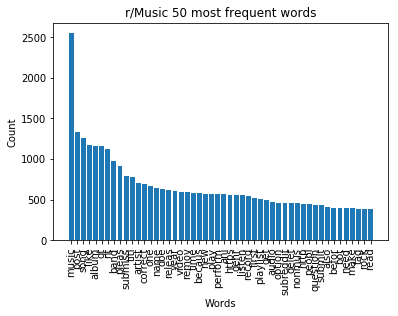

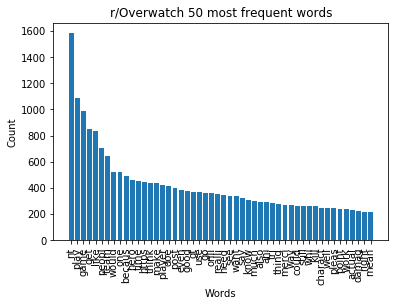

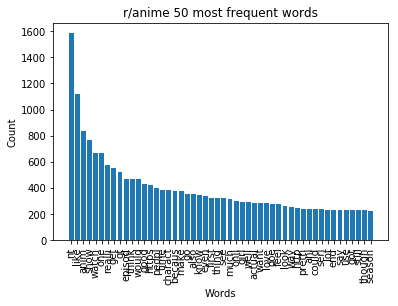

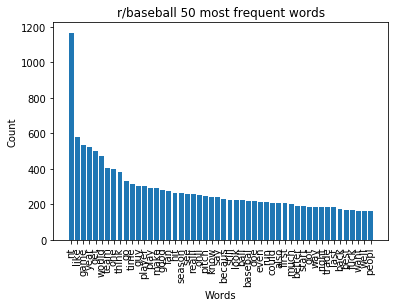

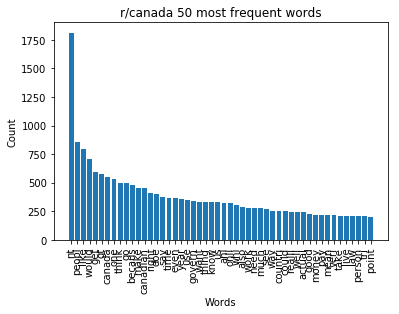

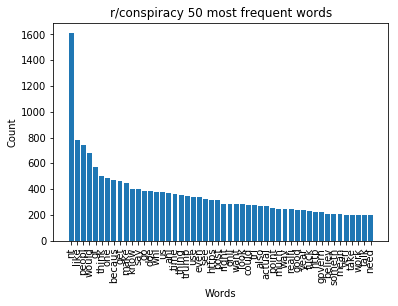

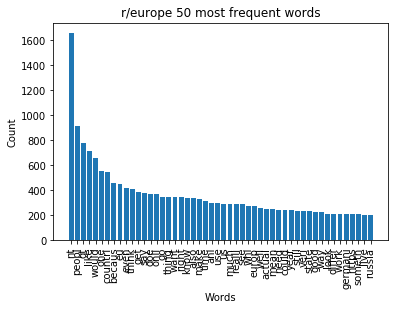

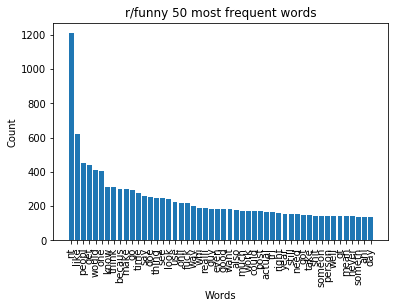

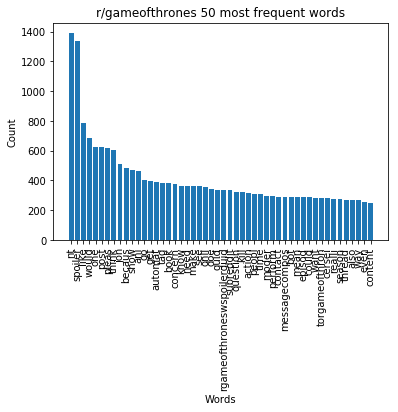

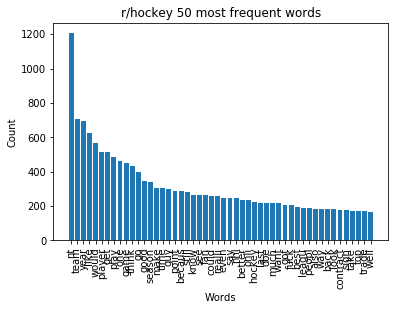

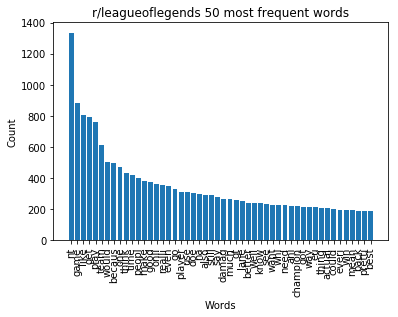

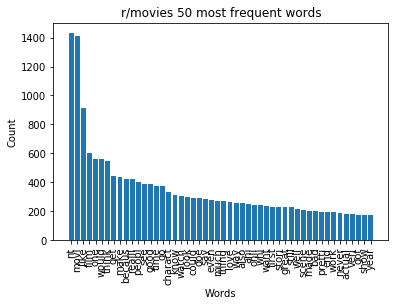

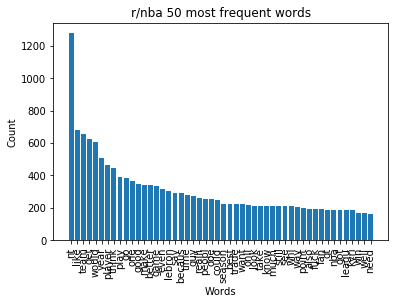

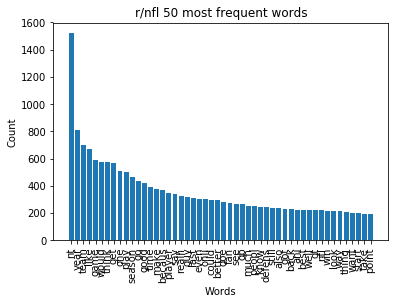

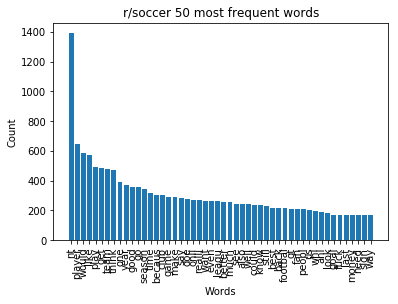

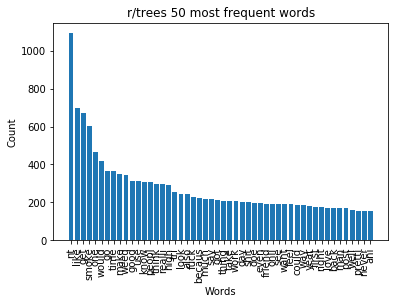

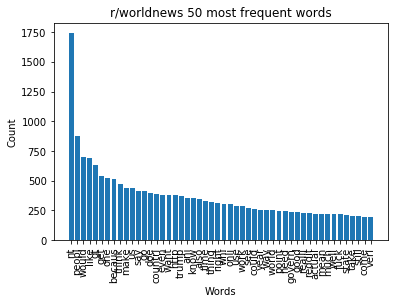

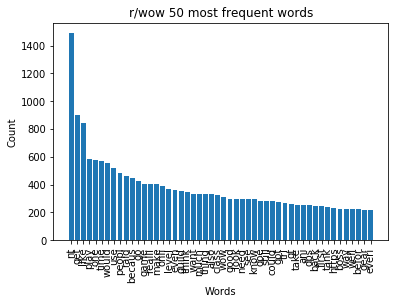

In [12]:
# Plot 50 most frequent words for each subreddits
for subreddit in subreddits:
  filename = '50_most_frequent_words_{}.png'.format(subreddit)
  data = word_dict[subreddit]
  plt.bar(data["words"][:50], data["counts"][:50])
  plt.xlabel("Words")
  plt.ylabel("Count")
  plt.xticks(rotation=90, ha='right')
  plt.title(r"r/{} 50 most frequent words".format(subreddit))
#   plt.savefig(filename)
#   files.download(filename)
  plt.show()
  


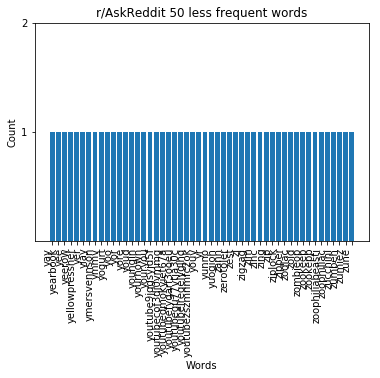

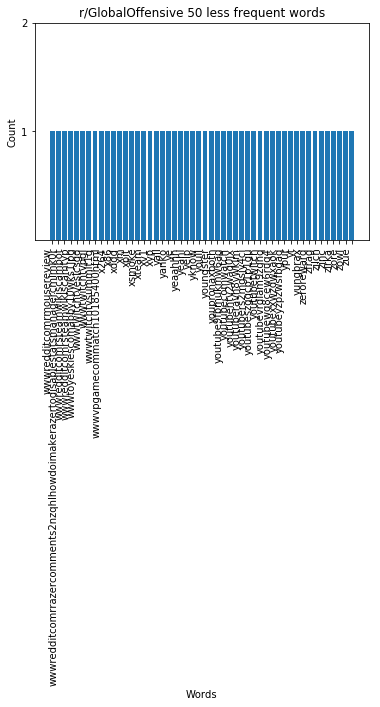

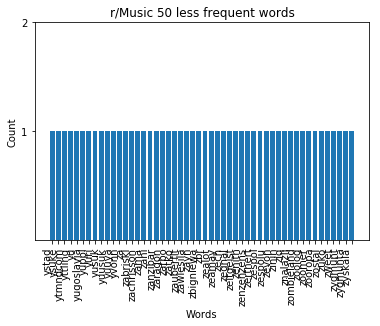

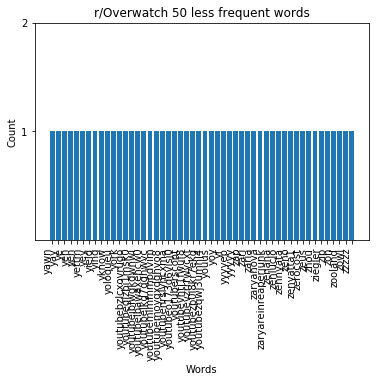

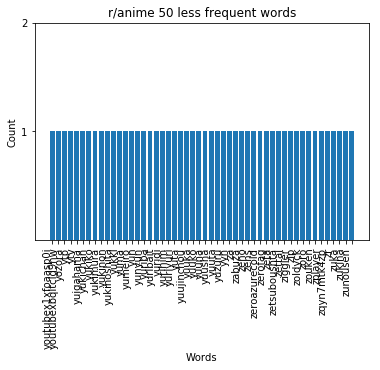

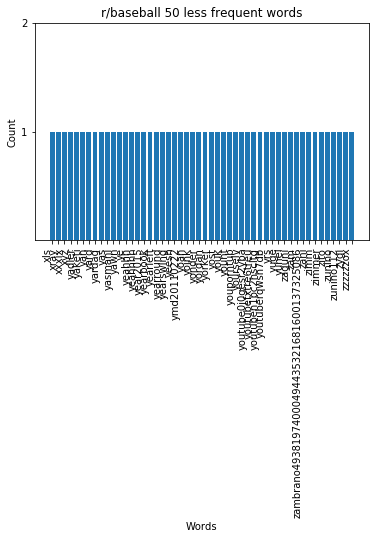

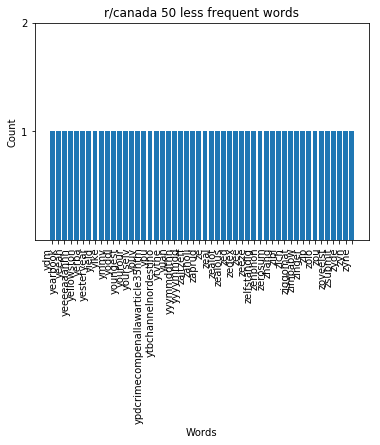

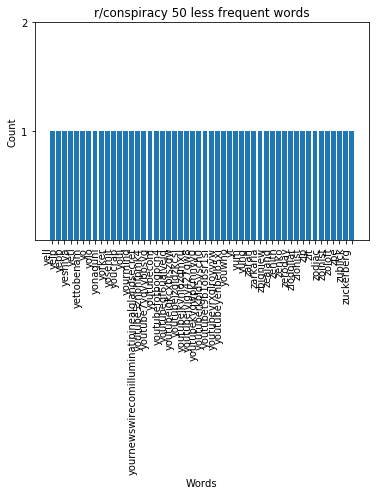

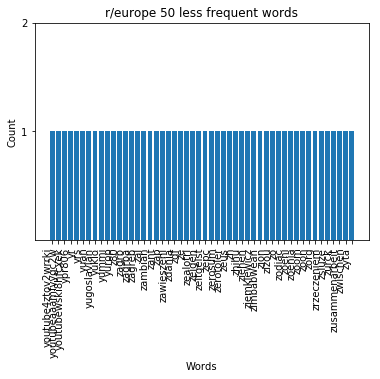

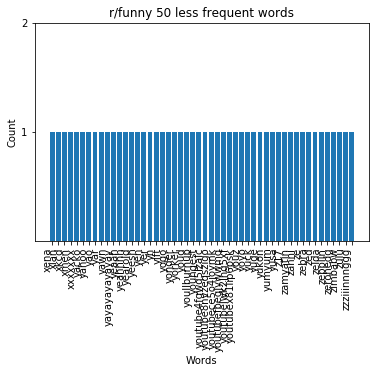

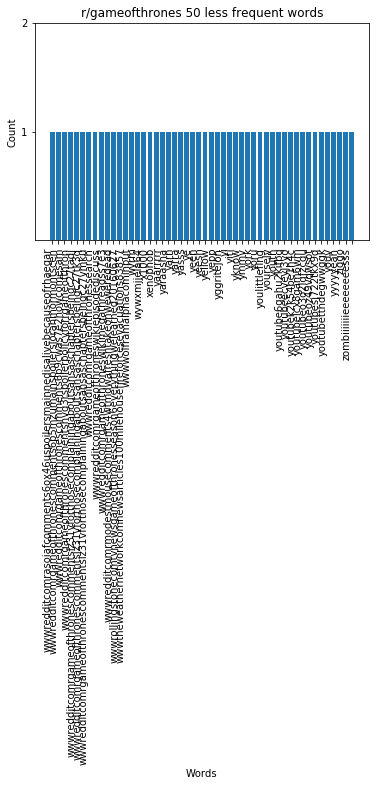

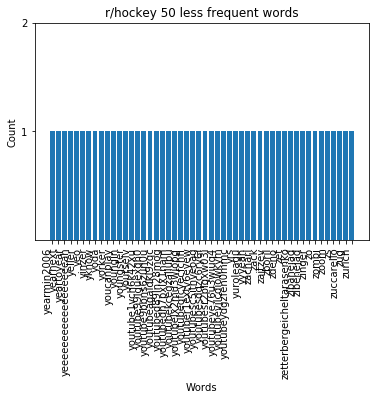

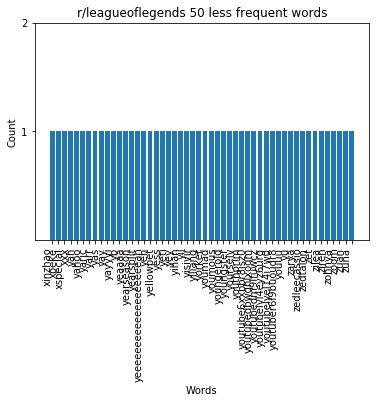

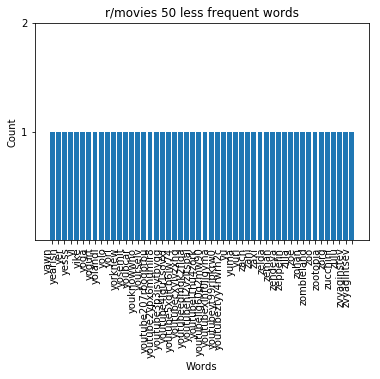

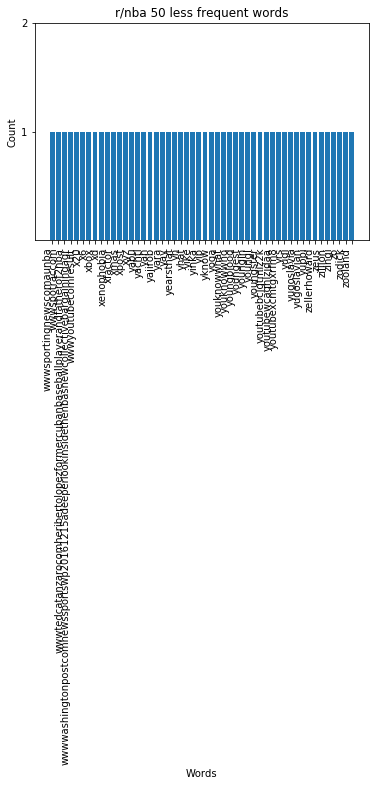

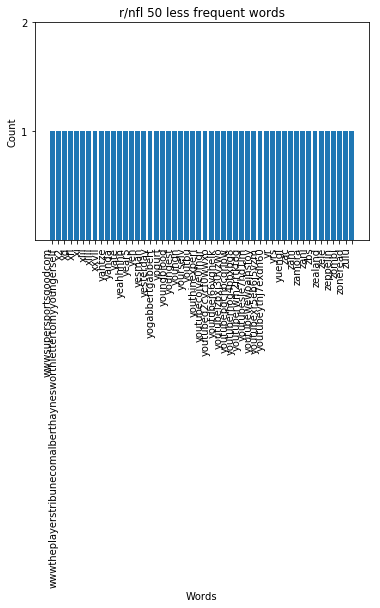

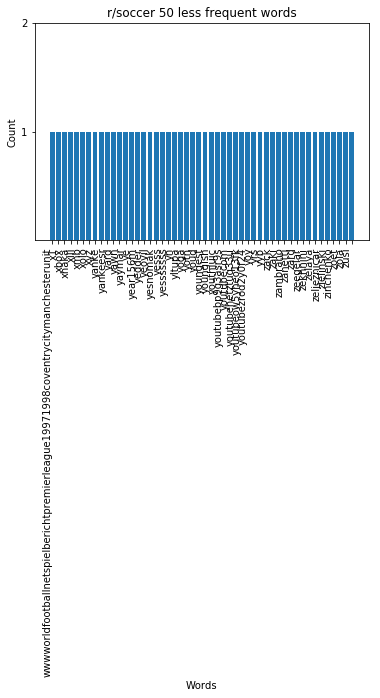

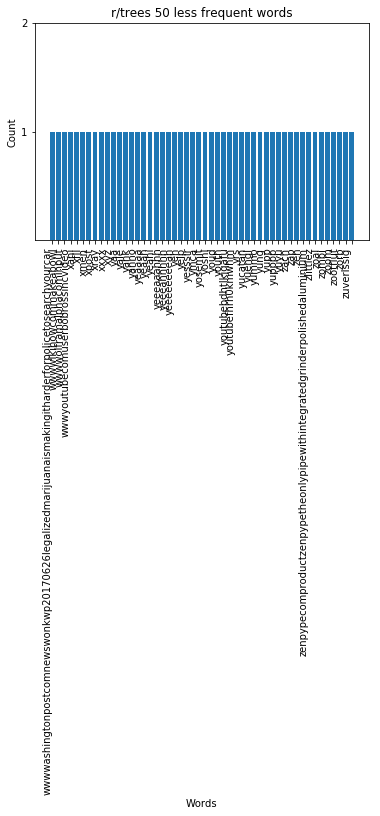

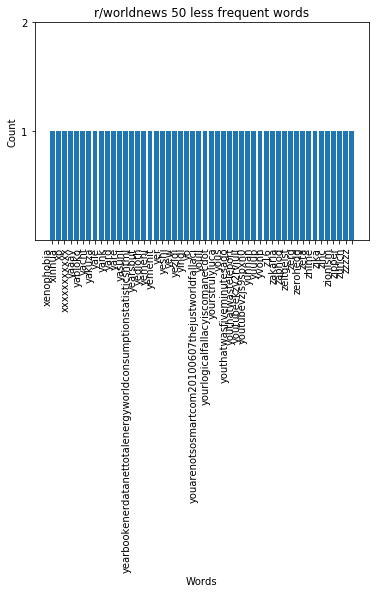

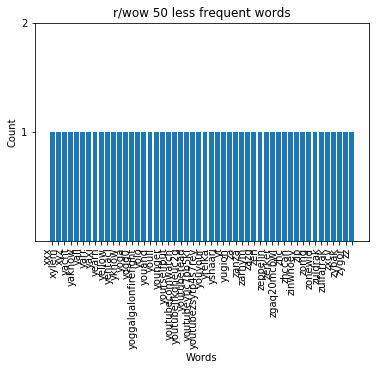

In [15]:
# Plot 50 less frequent words for each subreddits
for subreddit in subreddits:
  filename = '50_less_frequent_words_{}.png'.format(subreddit)
  data = word_dict[subreddit]
  plt.bar(data["words"][-50:], data["counts"][-50:])
  plt.xlabel("Words")
  plt.ylabel("Count")
  plt.xticks(rotation=90, ha='right')
  plt.yticks([1.0,2.0])
  plt.title(r"r/{} 50 less frequent words".format(subreddit))
#   plt.savefig(filename)
#   files.download(filename)
  plt.show()

In [0]:
# Create scaler 
scaler = MinMaxScaler()

# Normalize word count
# stemmed_df["word_count"] = scaler.fit_transform(stemmed_df["word_count"].to_numpy().reshape(-1,1))
# stemmed_df["comment_length"] = scaler.fit_transform(stemmed_df["word_count"].to_numpy().reshape(-1,1))


In [0]:
stemmed_df.groupby("label").count()

,id,comments,subreddits,cleaned
label,,,,
0,3500,3500,3500,3500
1,3500,3500,3500,3500
2,3500,3500,3500,3500
3,3500,3500,3500,3500
4,3500,3500,3500,3500
5,3500,3500,3500,3500
6,3500,3500,3500,3500
7,3500,3500,3500,3500
8,3500,3500,3500,3500
